# Build Neural Network NCA Model (No Experian)

In [128]:
#%%capture #Suppresses output of this cell so it doesn't clog your notebook.
import sys
#This will take a little while, run it in a separate cell:
#!conda install --yes --prefix {sys.prefix} 'botocore>=1.22.6' 'boto3>=1.20.46' 'pandas>=1.2.0' 's3fs>=0.4.2' 'pyreadstat>=1.1.4'

!{sys.executable} -m pip install pyreadstat xgboost

Keyring is skipped due to an exception: 'keyring.backends'


In [129]:
print(sys.executable)
print(sys.version)
print(sys.version_info)


/opt/conda/bin/python
3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [4]:
import boto3
import botocore

BUCKET_NAME = 'bluestembrands-bi-marketing-zone-prod' # replace with your bucket name
KEY = 'jimhafstad/NCA_2021/nca_tot_dev_val_no_exp.sas7bdat' # replace with your object key

s3 = boto3.resource('s3')

try:
    # download as local file
    s3.Bucket(BUCKET_NAME).download_file(KEY, 'nca_tot_dev_val_no_exp.sas7bdat')

    # OR read directly to memory as bytes:
    # bytes = s3.Object(BUCKET_NAME, KEY).get()['Body'].read() 
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [130]:
import multiprocessing
print('CPU Cores: ' + str(multiprocessing.cpu_count()))

import sys
print('Python Environment:')
print(sys.executable)
print(sys.version)
print(sys.version_info)

CPU Cores: 48
Python Environment:
/opt/conda/bin/python
3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [131]:
import pandas as pd
import pyreadstat
from time import process_time

t1_start = process_time()

fpath = "nca_tot_dev_val_no_exp.sas7bdat"
#df, meta = pyreadstat.read_file_multiprocessing(pyreadstat.read_sas7bdat, fpath, num_processes=multiprocessing.cpu_count())
#df, meta = pyreadstat.read_file_in_chunks(pyreadstat.read_sas7bdat, fpath, chunksize= 25000, multiprocess=True, num_processes=multiprocessing.cpu_count())
dev_val, meta = pyreadstat.read_sas7bdat(fpath)

t1_stop = process_time()
   
print("Elapsed time:", t1_stop, t1_start) 
   
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 

Elapsed time: 11043.065808035 11020.262767384
Elapsed time during the whole program in seconds: 22.80304065100063


In [132]:
dev_val.shape

(1169605, 163)

In [133]:
dev_val

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,...,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,8.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,0.0,901.0,50.0,1.0,0.0,...,-9.0,-9.0,1967.0,20211.0,1.0,5.0,1998.0,1.0,9.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,1.0,0.0,1085.0,20.0,0.0,0.0,...,-9.0,10.0,1978.0,20211.0,1.0,8.0,-9.0,5.0,9.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,0.0,1024.0,842.0,1.0,0.0,...,-9.0,8.0,1973.0,20211.0,1.0,5.0,-9.0,5.0,14.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,1076.0,72.0,4.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,954.0,589.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [134]:
dev_val.dtypes.value_counts()

float64    161
object       2
dtype: int64

In [135]:
dev_val.select_dtypes(include=['object']).head()

,campaigncode,individualid
0,21NCAAUG5,2013975508
1,21NCAAUG5,2014058219
2,21NCAAUG5,1000000052333
3,21NCAAUG5,1000000065144
4,21NCAAUG5,1000000112150


In [136]:
dev_val['RESPONSE_FLG'].value_counts()

0.0    945891
1.0    223714
Name: RESPONSE_FLG, dtype: int64

In [137]:
dev_val['campaigncode'].value_counts()

20NCANOV8     139151
21NCAMAR2R    121241
20NCAJUN4     116711
21NCAJUL4R    116627
21NCAOCT7     108976
21NCASEP6      41000
20NCANBBR      39881
21NCANOV8      38627
20NCAOCT6      38006
20NCAAUG5      28988
22NCAAPR2R     28182
21NCAAUG5      27829
20NCAOBB       27119
21NCAAPR3      24935
21NCAFEB2      24535
21NCADEC1      23524
21NCAD1        22925
21NCANBBR      22875
21NCAOBB       19243
21NCAJAN1R     18900
21NCAJUN4      18155
20NCAJUL4O     17834
20NCAOCT7      17659
22NCAFEB1R     17002
21NCAMBB       13324
22NCAJAN1      12789
20NCAMBBR      11645
21NCAMBBR      11425
21NCAMAY3R     10340
20NCAMAY3R      6580
22NCAABB        3577
Name: campaigncode, dtype: int64

In [138]:
list(dev_val)

['RESPONSE_SEGMENT',
 'RESPONSE_FLG',
 'RANDOM_FLG',
 'campaigncode',
 'current_hits_expz24',
 'current_hits_transunion',
 'dayssince1ston_expz24',
 'dayssincelaston_expz24',
 'fht_12mo_total',
 'fht_1mo_bigbook',
 'fht_1mo_total',
 'fht_24mo_standard',
 'fht_24mo_total',
 'fht_36mo_bigbook',
 'fht_36mo_standard',
 'fht_3mo_bigbook',
 'fht_3mo_total',
 'fht_dayssince1ststandarddecline',
 'individualid',
 'inferredminimumage',
 'subjectaddrcount',
 'inputaddrphonecount',
 'inputaddrageoldestrecord',
 'inputaddragenewestrecord',
 'inputaddrhistoricalmatch',
 'inputaddragelastsale',
 'inputaddrlastsalesprice',
 'inputaddrtaxvalue',
 'inputaddrtaxyr',
 'inputaddrtaxmarketvalue',
 'inputaddravmvalue60',
 'curraddrageoldestrecord',
 'curraddragelastsale',
 'curraddrtaxvalue',
 'curraddrtaxyr',
 'curraddrtaxmarketvalue',
 'prevaddrageoldestrecord',
 'prevaddragenewestrecord',
 'prevaddrlenofres',
 'prevaddrtaxmarketvalue',
 'addrmostrecentmoveage',
 'estimatedannualincome',
 'propownedtaxtota

##  Create a Random DF (rand) and a NON Random DF (non_rand)  split the NON Random DF into the dev and val

In [139]:
rand = dev_val[dev_val['RANDOM_FLG']==1]

In [140]:
rand

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,...,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351,nca_2021_score
50754,29.0,0.0,1.0,21NCAJUL4R,0.0,0.0,1019.0,107.0,3.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.497382
50755,33.0,0.0,1.0,21NCAJUL4R,0.0,0.0,319.0,107.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
50756,23.0,0.0,1.0,21NCAJUL4R,0.0,0.0,-9.0,-9.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.551920
50757,22.0,0.0,1.0,21NCAJUL4R,0.0,0.0,1081.0,685.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.746597
50758,35.0,0.0,1.0,21NCAJUL4R,0.0,0.0,1081.0,197.0,0.0,0.0,...,-9.0,1.0,1959.0,20211.0,1.0,5.0,-9.0,9.0,6.0,0.292958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167835,29.0,0.0,1.0,21NCAMAR2R,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.144449
1167836,30.0,0.0,1.0,21NCAMAR2R,0.0,0.0,1084.0,688.0,2.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.496387
1167837,34.0,0.0,1.0,21NCAMAR2R,0.0,0.0,719.0,719.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.498870
1167838,26.0,0.0,1.0,21NCAMAR2R,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.264195


In [141]:
non_rand = dev_val[dev_val['RANDOM_FLG']==0]

In [142]:
non_rand

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,...,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,8.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,0.0,901.0,50.0,1.0,0.0,...,-9.0,-9.0,1967.0,20211.0,1.0,5.0,1998.0,1.0,9.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,1.0,0.0,1085.0,20.0,0.0,0.0,...,-9.0,10.0,1978.0,20211.0,1.0,8.0,-9.0,5.0,9.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,0.0,1024.0,842.0,1.0,0.0,...,-9.0,8.0,1973.0,20211.0,1.0,5.0,-9.0,5.0,14.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,1076.0,72.0,4.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,954.0,589.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [143]:
# Scen 1 campaigncodes
dev_mail_dt = [
'20NCAAUG5' ,
'20NCAJUL4O' ,
'20NCAMAY3R' ,
'20NCAMBBR' ,
'20NCANBBR' ,
'20NCAOBB' ,
'20NCAOCT6' ,
'21NCAAPR3' ,
'21NCAD1' ,
'21NCAFEB2' ,
'21NCAJAN1R' ,
'21NCAJUN4' ,
'21NCAMAR2R' ,
'21NCAMBB' ,
'21NCAMBBR' ,
'21NCANOV8' ,
'21NCAOBB' ,
'21NCASEP6' ,
'22NCAABB' ,
'22NCAFEB1R'

    
              ]

In [144]:
# Scen 1 campaigncodes
val_mail_dt = [
   '20NCAJUN4' ,
'20NCANOV8' ,
'20NCAOCT7' ,
'21NCAAUG5' ,
'21NCADEC1' ,
'21NCAJUL4R' ,
'21NCAMAY3R' ,
'21NCANBBR' ,
'21NCAOCT7' ,
'22NCAAPR2R' ,
'22NCAJAN1' 


    
    
              ]

In [145]:
dev = non_rand[non_rand['campaigncode'].isin(dev_mail_dt)]

In [146]:
dev

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,...,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351,nca_2021_score
27829,2.0,1.0,0.0,21NCAD1,0.0,0.0,966.0,205.0,1.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.674719
27830,5.0,0.0,0.0,21NCAD1,0.0,0.0,-9.0,-9.0,6.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.501649
27831,2.0,0.0,0.0,21NCAD1,0.0,0.0,722.0,82.0,2.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.484958
27832,3.0,0.0,0.0,21NCAD1,0.0,0.0,-9.0,-9.0,2.0,0.0,...,-9.0,3.0,1985.0,20212.0,1.0,4.0,-9.0,2.0,4.0,0.175513
27833,3.0,0.0,0.0,21NCAD1,1.0,0.0,1087.0,-9.0,4.0,0.0,...,-9.0,0.0,1987.0,20211.0,1.0,3.0,-9.0,3.0,1.0,0.444325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,1076.0,72.0,4.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,0.0,954.0,589.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [147]:
dev['RESPONSE_FLG'].value_counts()

0.0    297664
1.0    147398
Name: RESPONSE_FLG, dtype: int64

In [148]:
val = non_rand[non_rand['campaigncode'].isin(val_mail_dt)]

In [149]:
val

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,...,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,0.0,-9.0,-9.0,8.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,0.0,901.0,50.0,1.0,0.0,...,-9.0,-9.0,1967.0,20211.0,1.0,5.0,1998.0,1.0,9.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,1.0,0.0,1085.0,20.0,0.0,0.0,...,-9.0,10.0,1978.0,20211.0,1.0,8.0,-9.0,5.0,9.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,0.0,1024.0,842.0,1.0,0.0,...,-9.0,8.0,1973.0,20211.0,1.0,5.0,-9.0,5.0,14.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,8.0,0.0,0.0,21NCAMAY3R,0.0,0.0,-9.0,-9.0,0.0,0.0,...,-9.0,8.0,1959.0,20204.0,-9.0,5.0,-9.0,9.0,7.0,0.608210
1169297,5.0,1.0,0.0,21NCAMAY3R,0.0,0.0,-9.0,-9.0,4.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.351717
1169299,9.0,0.0,0.0,21NCAMAY3R,0.0,0.0,164.0,103.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.696921
1169307,3.0,0.0,0.0,21NCAMAY3R,0.0,0.0,469.0,287.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601339


In [150]:
val['RESPONSE_FLG'].value_counts()

0.0    159339
1.0     75456
Name: RESPONSE_FLG, dtype: int64

# Write out vectors of the Current NCA score for DEV and VAL

In [151]:
prev_mdl_dev = dev['nca_2021_score']

In [152]:
prev_mdl_dev

27829      0.674719
27830      0.501649
27831      0.484958
27832      0.175513
27833      0.444325
             ...   
1169600    0.699729
1169601    0.854719
1169602    0.601271
1169603    0.835147
1169604    0.658534
Name: nca_2021_score, Length: 445062, dtype: float64

In [153]:
prev_mdl_val = val['nca_2021_score']

In [154]:
prev_mdl_val

0          0.638242
1          0.482783
2          0.771830
3          0.795122
4          0.685679
             ...   
1169292    0.608210
1169297    0.351717
1169299    0.696921
1169307    0.601339
1169308    0.409810
Name: nca_2021_score, Length: 234795, dtype: float64

In [155]:
prev_mdl_rand = rand['nca_2021_score']

In [156]:
prev_mdl_rand

50754      0.497382
50755      0.638242
50756      0.551920
50757      0.746597
50758      0.292958
             ...   
1167835    0.144449
1167836    0.496387
1167837    0.498870
1167838    0.264195
1167839    0.214795
Name: nca_2021_score, Length: 489748, dtype: float64

# DEV, VAL, and RAND Campaign Codes

In [157]:
dev_mail=dev.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

dev_mail['resp_rate'] = dev_mail['sum']/dev_mail['count']

dev_mail.columns = ['Mailed','Responders','NRR']

dev_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAAUG5,"28,988","11,683",40.3%
20NCAJUL4O,"17,834","6,568",36.8%
20NCAMAY3R,"6,580","1,850",28.1%
20NCAMBBR,"11,645","5,598",48.1%
20NCANBBR,"39,881","18,374",46.1%
20NCAOBB,"27,119","12,429",45.8%
20NCAOCT6,"38,006","11,813",31.1%
21NCAAPR3,"24,935","6,263",25.1%
21NCAD1,"22,925","5,669",24.7%


In [158]:
val_mail=val.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

val_mail['resp_rate'] = val_mail['sum']/val_mail['count']

val_mail.columns = ['Mailed','Responders','NRR']

val_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAJUN4,"16,881","7,266",43.0%
20NCANOV8,"39,224","11,338",28.9%
20NCAOCT7,"17,659","3,933",22.3%
21NCAAUG5,"27,829","10,938",39.3%
21NCADEC1,"23,524","6,262",26.6%
21NCAJUL4R,"16,697","7,401",44.3%
21NCAMAY3R,"10,340","2,147",20.8%
21NCANBBR,"22,875","10,823",47.3%
21NCAOCT7,"18,795","3,973",21.1%


In [159]:
rand_mail=rand.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

rand_mail['resp_rate'] = rand_mail['sum']/rand_mail['count']

rand_mail.columns = ['Mailed','Responders','NRR']

rand_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAJUN4,"99,830",208,0.2%
20NCANOV8,"99,927",266,0.3%
21NCAJUL4R,"99,930",147,0.1%
21NCAMAR2R,"99,880",118,0.1%
21NCAOCT7,"90,181",121,0.1%


In [160]:
# drop vars
drop_vars = ['RANDOM_FLG'
,'campaigncode'
,'individualid'
,'RESPONSE_SEGMENT'
,'nca_2021_score'
             
,'versiondatemkey'             


]

In [161]:
dev = dev.drop(drop_vars,axis=1)

In [162]:
dev

,RESPONSE_FLG,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,fht_1mo_total,fht_24mo_standard,fht_24mo_total,...,ibe_8167_11,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351
27829,1.0,0.0,0.0,966.0,205.0,1.0,1.0,1.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27830,0.0,0.0,0.0,-9.0,-9.0,6.0,0.0,1.0,0.0,6.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27831,0.0,0.0,0.0,722.0,82.0,2.0,0.0,0.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27832,0.0,0.0,0.0,-9.0,-9.0,2.0,0.0,0.0,0.0,9.0,...,-9.0,-9.0,3.0,1985.0,20212.0,1.0,4.0,-9.0,2.0,4.0
27833,0.0,1.0,0.0,1087.0,-9.0,4.0,0.0,1.0,0.0,6.0,...,-9.0,-9.0,0.0,1987.0,20211.0,1.0,3.0,-9.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,1.0,0.0,0.0,-9.0,-9.0,1.0,0.0,0.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169601,1.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169602,0.0,0.0,0.0,1076.0,72.0,4.0,0.0,0.0,0.0,4.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169603,0.0,0.0,0.0,954.0,589.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [163]:
val = val.drop(drop_vars,axis=1)

In [164]:
val

,RESPONSE_FLG,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,fht_1mo_total,fht_24mo_standard,fht_24mo_total,...,ibe_8167_11,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351
0,1.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,0.0,0.0,0.0,-9.0,-9.0,8.0,0.0,0.0,0.0,10.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,0.0,0.0,0.0,901.0,50.0,1.0,0.0,1.0,0.0,1.0,...,-9.0,-9.0,-9.0,1967.0,20211.0,1.0,5.0,1998.0,1.0,9.0
3,0.0,1.0,0.0,1085.0,20.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-9.0,10.0,1978.0,20211.0,1.0,8.0,-9.0,5.0,9.0
4,1.0,0.0,0.0,1024.0,842.0,1.0,0.0,1.0,0.0,2.0,...,1.0,-9.0,8.0,1973.0,20211.0,1.0,5.0,-9.0,5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,0.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,8.0,1959.0,20204.0,-9.0,5.0,-9.0,9.0,7.0
1169297,1.0,0.0,0.0,-9.0,-9.0,4.0,0.0,0.0,0.0,5.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169299,0.0,0.0,0.0,164.0,103.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169307,0.0,0.0,0.0,469.0,287.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [165]:
rand = rand.drop(drop_vars,axis=1)

In [166]:
rand

,RESPONSE_FLG,current_hits_expz24,current_hits_transunion,dayssince1ston_expz24,dayssincelaston_expz24,fht_12mo_total,fht_1mo_bigbook,fht_1mo_total,fht_24mo_standard,fht_24mo_total,...,ibe_8167_11,ibe_8600_08,ibe_8607,ibe_8611_01,ibe_8614,ibe_8621_04,ibe_8641,ibe_8691_01,ibe_8718,ibe_9351
50754,0.0,0.0,0.0,1019.0,107.0,3.0,0.0,0.0,4.0,8.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50755,0.0,0.0,0.0,319.0,107.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50756,0.0,0.0,0.0,-9.0,-9.0,1.0,0.0,0.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50757,0.0,0.0,0.0,1081.0,685.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50758,0.0,0.0,0.0,1081.0,197.0,0.0,0.0,0.0,4.0,4.0,...,-9.0,-9.0,1.0,1959.0,20211.0,1.0,5.0,-9.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167835,0.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167836,0.0,0.0,0.0,1084.0,688.0,2.0,0.0,0.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167837,0.0,0.0,0.0,719.0,719.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167838,0.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [167]:
dev.columns

Index(['RESPONSE_FLG', 'current_hits_expz24', 'current_hits_transunion',
       'dayssince1ston_expz24', 'dayssincelaston_expz24', 'fht_12mo_total',
       'fht_1mo_bigbook', 'fht_1mo_total', 'fht_24mo_standard',
       'fht_24mo_total',
       ...
       'ibe_8167_11', 'ibe_8600_08', 'ibe_8607', 'ibe_8611_01', 'ibe_8614',
       'ibe_8621_04', 'ibe_8641', 'ibe_8691_01', 'ibe_8718', 'ibe_9351'],
      dtype='object', length=157)

In [168]:
import locale
import pandas as pd
# import xgboost as xgb
import os
# from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

# Label dev, val, and rand as final data frames

In [169]:
dev_final = dev
val_final = val
rand_final = rand

## Keep the 110 attributes

In [170]:
# keep statement vars
keep_vars = ['RESPONSE_FLG',
'ibe_6864' ,
'ibe_8614' ,
'ibe_8167_01' ,
'ibe_9351' ,
'ibe_7607_01' ,
'ibe_8718' ,
'ibe_2523_01' ,
'fflg1891' ,
'ibe_8167_11' ,
'ibe_6604' ,
'ibe_2767' ,
'rbgmn694' ,
'ibe_8641' ,
'pflg2113' ,
'ibe_3448' ,
'pflg2112' ,
'ibe_7110' ,
'ibe_3595' ,
'ibe_6841' ,
'ibe_8621_04' ,
'ibe_8607' ,
'ibe_6605' ,
'subjectaddrcount' ,
'phoneotheragenewestrecord' ,
'inputaddragenewestrecord' ,
'lienjudgmentfiledtotal' ,
'curraddrageoldestrecord' ,
'addrmostrecentmoveage' ,
'inputaddrhistoricalmatch' ,
'bankruptcyage' ,
'inputaddragelastsale' ,
'prevaddragenewestrecord' ,
'prevaddrageoldestrecord' ,
'inputaddrphonecount' ,
'propagenewestpurchase' ,
'prevaddrlenofres' ,
'inputaddrageoldestrecord' ,
'curraddragelastsale' ,
'curraddrtaxmarketvalue' ,
'miacs_05_003' ,
'miacs_11_040' ,
'miacs_25_058' ,
'miacs_25_061' ,
'miacs_22_001' ,
'miacs_18_003' ,
'miacs_25_118' ,
'miacs_25_050' ,
'miacs_24_004' ,
'miacs_25_100' ,
'miacs_19_041' ,
'miacs_08_001' ,
'miacs_25_065' ,
'miacs_06_002' ,
'miacs_19_058' ,
'miacs_19_052' ,
'miacs_24_036' ,
'miacs_25_064' ,
'miacs_27_010' ,
'miacs_25_037' ,
'miacs_08_006' ,
'miacs_24_013' ,
'miacs_25_121' ,
'miacs_25_006' ,
'miacs_24_033' ,
'miacs_25_090' ,
'miacs_25_096' ,
'miacs_08_002' ,
'miacs_25_016' ,
'miacs_24_017' ,
'miacs_19_032' ,
'miacs_25_089' ,
'miacs_25_106' ,
'miacs_19_021' ,
'miacs_11_038' ,
'miacs_19_036' ,
'miacs_23_014' ,
'miacs_25_023' ,
'miacs_25_057' ,
'miacs_25_094' ,
'miacs_19_063' ,
'miacs_15_006' ,
'miacs_25_030' ,
'miacs_15_002' ,
'miacs_21_008' ,
'miacs_17_002' ,
'miacs_01_033' ,
'miacs_19_069' ,
'miacs_19_029' ,
'miacs_25_013' ,
'miacs_19_045' ,
'miacs_14_005' ,
'miacs_25_035' ,
'miacs_19_035' ,
'miacs_19_012' ,
'miacs_27_007' ,
'miacs_23_018' ,
'miacs_25_082' ,
'fht_24mo_total' ,
'dayssince1ston_expz24' ,
'current_hits_expz24' ,
'fht_36mo_standard' ,
'fht_36mo_bigbook' ,
'fht_12mo_total' ,
'fht_1mo_bigbook' ,
'dayssincelaston_expz24' ,
'fht_dayssince1ststandarddecline' ,
'fht_3mo_total' ,
'fht_3mo_bigbook' ,
'fht_1mo_total' ,
'fht_24mo_standard']

In [171]:
dev_final = dev_final[keep_vars]
val_final = val_final[keep_vars]
rand_final = rand_final[keep_vars]

# Create X and y

In [172]:
X_train = dev_final.drop('RESPONSE_FLG',axis=1)
y_train = dev_final['RESPONSE_FLG']
 
X_oot = val_final.drop('RESPONSE_FLG',axis=1)
y_oot = val_final['RESPONSE_FLG']

X_rand = rand_final.drop('RESPONSE_FLG',axis=1)
y_rand = rand_final['RESPONSE_FLG']
 
# import xgboost as xgb
 
# xgb_oot = xgb.DMatrix(X_oot,label=y_oot)
# xgb_train = xgb.DMatrix(X_train,label=y_train)
# xgb_rand = xgb.DMatrix(X_rand,label=y_rand)

# Model Summary Report Function

In [173]:
def model_summary_xgb(target, df_file, xgb_object, num_bins, old_score, Dmatrix, weight):
    
    resp = pd.DataFrame(df_file[target])
    
    resp = resp.reset_index(drop=True)
    
    
    pred = xgb_object.predict(Dmatrix)
    

    score = pd.DataFrame(np.round(pred*1000))
    score.columns = ['score']

    score_perf = pd.concat([resp,score],axis=1)
    
    # New Weight code added here
    score_perf_nonresp = score_perf[score_perf[target] == 0]
    
    score_perf_resp = score_perf[score_perf[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_nonresp2 = pd.DataFrame(np.repeat(score_perf_nonresp.values, repl_nonresp, axis=0))
    score_perf_nonresp2.columns = score_perf_nonresp.columns
    
    weighted_tot = pd.concat([score_perf_resp,score_perf_nonresp2],axis=0)
    weighted_tot = weighted_tot.reset_index(drop=True)
    
    
    
    
    weighted_tot['score_bin'] = pd.qcut(weighted_tot['score'], q=num_bins, precision=0,duplicates='drop')

    df_summary=weighted_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary['resp_rate'] = df_summary['sum']/df_summary['count']
    df_summary.columns = ['Mailed_New','Resp_New','NRR_New']

    df_summary = df_summary.reset_index(drop=False)


    score_seg = df_summary.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary['Mailed_New'][seg]
        rsp += df_summary['Resp_New'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_df = pd.DataFrame(cum_NRR)
    cum_NRR_df.columns = ['cum_NRR_New']

    df_summary = pd.concat([df_summary,cum_NRR_df],axis=1)
    
    
    

   # this section is for the summarization of the Old benchmark model score 
    
    
    
    
    score_curr = pd.DataFrame(old_score)
    score_curr.columns = ['old_score']
    
    score_curr = score_curr.reset_index(drop=True)

    score_perf_curr = pd.concat([resp,score_curr],axis=1)
    
    # New Weight code added here
    score_perf_curr_nonresp = score_perf_curr[score_perf_curr[target] == 0]
    
    score_perf_curr_resp = score_perf_curr[score_perf_curr[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_curr_nonresp2 = pd.DataFrame(np.repeat(score_perf_curr_nonresp.values, repl_nonresp, axis=0))
    score_perf_curr_nonresp2.columns = score_perf_curr_nonresp.columns
    
    weighted_curr_tot = pd.concat([score_perf_curr_resp,score_perf_curr_nonresp2],axis=0)
    weighted_curr_tot = weighted_curr_tot.reset_index(drop=True)
    
    
    
    
    weighted_curr_tot['score_bin'] = pd.qcut(weighted_curr_tot['old_score'], q=num_bins, precision=0,duplicates='drop')

    df_summary_curr=weighted_curr_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary_curr['resp_rate'] = df_summary_curr['sum']/df_summary_curr['count']
    df_summary_curr.columns = ['Mailed_Old','Resp_Old','NRR_Old']

    df_summary_curr = df_summary_curr.reset_index(drop=False)


    score_seg = df_summary_curr.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary_curr['Mailed_Old'][seg]
        rsp += df_summary_curr['Resp_Old'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_curr = pd.DataFrame(cum_NRR)
    cum_NRR_curr.columns = ['cum_NRR_Old']
    
    df_summary_curr2 = df_summary_curr.drop('score_bin',axis=1)

    df_summary_curr3 = pd.concat([df_summary_curr2,cum_NRR_curr],axis=1)
    
    df_summary_comp = pd.concat([df_summary,df_summary_curr3],axis=1)
    df_summary_comp['NRR_Lift'] = (df_summary_comp['cum_NRR_New']/df_summary_comp['cum_NRR_Old']) - 1
    
    
    
    
    
    
    return df_summary_comp.style.format({
        'Resp_New': '{:,.0f}'.format,
        'Resp_Old': '{:,.0f}'.format,
        'NRR_New': '{:,.2%}'.format,
        'cum_NRR_New': '{:,.2%}'.format,
        'NRR_Old': '{:,.2%}'.format,
        'cum_NRR_Old': '{:,.2%}'.format,
        'NRR_Lift': '{:,.2%}'.format,
    })
    
    

# Run Neural Network

In [48]:
!pip install tensorflow

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached flatbuffers-22.11.23-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached protobuf-3.19.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.2 MB/s eta 0:00:00:00:0100:01
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorflow_io_gcs_f

### Set seed to make the model reproducible

In [174]:
# Seed value
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [175]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import time

In [176]:
X_train.shape[1]

110

In [178]:
#seed(123)
#tf.random.set_seed(123)

import time
# get the start time
st = time.time()

input_var = X_train.shape[1]
i = 100

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, input_dim=input_var, activation='relu'),
    keras.layers.Dropout(rate=0.2, seed=123),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, activation='relu'),
    keras.layers.Dropout(rate=0.2, seed=123),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(i, activation='relu'),
#     keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=70, batch_size=64, verbose=0, validation_data=(X_oot,y_oot), callbacks=[callback], shuffle=False)
#model.fit(X_train, y_train, epochs=70, batch_size=64, verbose=0,  validation_split=0.3, callbacks=[callback], shuffle=False)
#model.fit(X_train3, y_train3, epochs=50, batch_size=3737, verbose=0,  validation_split=0)


et = time.time()
# get execution time in minutes
res = et - st
final_res = res / 60
print('Execution time:', final_res, 'minutes')

Execution time: 4.334158205986023 minutes


## Save Untuned Neural Network Model

In [53]:
model.save('Untuned Attributes 110 Neural Network.h5')

## Load Untuned Neural Network Model

In [ ]:
from keras.models import load_model
model = load_model('Untuned Attributes 110 Neural Network.h5')

## Untuned Neural Network Performance

In [55]:
df_summary_comp_dev = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=1)
df_summary_comp_dev

13909/13909 [==============================] - 12s 845us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(456.0, 1000.0]",44309,"25,284",57.06%,57.06%,44507,"28,300",63.59%,63.59%,-10.26%
1,"(383.0, 456.0]",44518,"20,406",45.84%,51.44%,44506,"22,135",49.73%,56.66%,-9.22%
2,"(347.0, 383.0]",44626,"17,908",40.13%,47.66%,44506,"18,878",42.42%,51.91%,-8.20%
3,"(306.0, 347.0]",43672,"15,875",36.35%,44.87%,44506,"16,576",37.24%,48.25%,-7.00%
4,"(270.0, 306.0]",45115,"14,914",33.06%,42.47%,44506,"14,809",33.27%,45.25%,-6.14%
5,"(234.0, 270.0]",43762,"13,295",30.38%,40.48%,44506,"13,070",29.37%,42.60%,-4.98%
6,"(195.0, 234.0]",44765,"12,062",26.95%,38.53%,44506,"11,306",25.40%,40.15%,-4.02%
7,"(152.0, 195.0]",44693,"10,832",24.24%,36.73%,44506,"9,378",21.07%,37.76%,-2.72%
8,"(100.0, 152.0]",45027,"9,543",21.19%,34.99%,44506,"7,832",17.60%,35.52%,-1.50%
9,"(-1.0, 100.0]",44575,"7,279",16.33%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


In [56]:
df_summary_comp_val = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=1)
df_summary_comp_val

7338/7338 [==============================] - 6s 852us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(476.0, 1000.0]",23409,"13,370",57.11%,57.11%,23480,"14,947",63.66%,63.66%,-10.28%
1,"(394.0, 476.0]",23299,"10,153",43.58%,50.36%,23479,"11,205",47.72%,55.69%,-9.57%
2,"(358.0, 394.0]",23505,"8,711",37.06%,45.91%,23480,"9,597",40.87%,50.75%,-9.54%
3,"(317.0, 358.0]",23127,"8,049",34.80%,43.16%,23479,"8,115",34.56%,46.70%,-7.60%
4,"(282.0, 317.0]",23852,"7,232",30.32%,40.54%,23479,"7,403",31.53%,43.67%,-7.16%
5,"(246.0, 282.0]",23576,"6,772",28.72%,38.56%,23480,"6,483",27.61%,40.99%,-5.92%
6,"(208.0, 246.0]",23377,"6,044",25.85%,36.75%,23479,"5,802",24.71%,38.67%,-4.95%
7,"(163.0, 208.0]",23590,"5,687",24.11%,35.17%,23480,"5,097",21.71%,36.55%,-3.78%
8,"(107.0, 163.0]",23318,"5,171",22.18%,33.73%,23479,"4,126",17.57%,34.44%,-2.06%
9,"(-1.0, 107.0]",23742,"4,267",17.97%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


In [57]:
df_summary_comp_rand = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final, xgb_object=model,num_bins=10,old_score=prev_mdl_rand,Dmatrix=X_rand,weight=1)
df_summary_comp_rand

15305/15305 [==============================] - 13s 848us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(412.0, 1000.0]",48577,168,0.35%,0.35%,48975,290,0.59%,0.59%,-41.59%
1,"(364.0, 412.0]",41445,92,0.22%,0.29%,48975,140,0.29%,0.44%,-34.21%
2,"(336.0, 364.0]",55856,104,0.19%,0.25%,48975,83,0.17%,0.35%,-28.54%
3,"(298.0, 336.0]",49828,104,0.21%,0.24%,48974,82,0.17%,0.30%,-21.27%
4,"(268.0, 298.0]",47671,75,0.16%,0.22%,48975,78,0.16%,0.27%,-18.82%
5,"(239.0, 268.0]",49183,57,0.12%,0.21%,48975,53,0.11%,0.25%,-16.99%
6,"(206.0, 239.0]",49207,81,0.16%,0.20%,48974,49,0.10%,0.23%,-11.86%
7,"(167.0, 206.0]",48951,69,0.14%,0.19%,48975,32,0.07%,0.21%,-6.81%
8,"(118.0, 167.0]",49777,50,0.10%,0.18%,48975,35,0.07%,0.19%,-4.93%
9,"(-1.0, 118.0]",49253,60,0.12%,0.18%,48975,18,0.04%,0.18%,0.00%


### Development - Weighted

In [58]:
df_summary_comp_dev_w = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=125)
df_summary_comp_dev_w

13909/13909 [==============================] - 12s 866us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(417.0, 1000.0]",3701169,"34,669",0.94%,0.94%,3735472,"42,472",1.14%,1.14%,-17.62%
1,"(364.0, 417.0]",2939479,"17,979",0.61%,0.79%,3735556,"23,681",0.63%,0.89%,-10.46%
2,"(318.0, 364.0]",4537322,"22,072",0.49%,0.67%,3735534,"18,034",0.48%,0.75%,-11.02%
3,"(282.0, 318.0]",3677754,"15,129",0.41%,0.60%,3735476,"15,101",0.40%,0.66%,-8.98%
4,"(246.0, 282.0]",3741973,"13,473",0.36%,0.56%,3735619,"12,744",0.34%,0.60%,-7.38%
5,"(211.0, 246.0]",3749960,"11,710",0.31%,0.51%,3735492,"10,492",0.28%,0.55%,-5.84%
6,"(174.0, 211.0]",3752354,"10,229",0.27%,0.48%,3735614,"8,614",0.23%,0.50%,-4.30%
7,"(134.0, 174.0]",3760010,"9,135",0.24%,0.45%,3735487,"7,112",0.19%,0.46%,-2.71%
8,"(88.0, 134.0]",3726284,"7,284",0.20%,0.42%,3735549,"5,674",0.15%,0.43%,-1.46%
9,"(-1.0, 88.0]",3769093,"5,718",0.15%,0.39%,3735599,"3,474",0.09%,0.39%,0.00%


In [59]:
df_summary_comp_val_w = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=125)
df_summary_comp_val_w

7338/7338 [==============================] - 6s 854us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(430.0, 1000.0]",1987210,"18,210",0.92%,0.92%,1999243,"22,243",1.11%,1.11%,-17.64%
1,"(364.0, 430.0]",2006434,"10,559",0.53%,0.72%,1999212,"11,712",0.59%,0.85%,-15.17%
2,"(331.0, 364.0]",1981363,"8,863",0.45%,0.63%,1999273,"8,773",0.44%,0.71%,-11.59%
3,"(294.0, 331.0]",2006194,"7,319",0.36%,0.56%,1999355,"7,480",0.37%,0.63%,-10.29%
4,"(261.0, 294.0]",1988605,"6,605",0.33%,0.52%,1999215,"6,340",0.32%,0.57%,-8.59%
5,"(227.0, 261.0]",2000028,"5,903",0.30%,0.48%,1999378,"5,378",0.27%,0.52%,-7.01%
6,"(190.0, 227.0]",2005548,"5,298",0.26%,0.45%,1999211,"4,711",0.24%,0.48%,-5.69%
7,"(147.0, 190.0]",2014095,"4,970",0.25%,0.42%,1999274,"3,899",0.20%,0.44%,-3.95%
8,"(95.0, 147.0]",1982078,"4,328",0.22%,0.40%,1999340,"3,090",0.15%,0.41%,-2.01%
9,"(-1.0, 95.0]",2021276,"3,401",0.17%,0.38%,1999330,"1,830",0.09%,0.38%,0.00%


In [60]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = model

Dmatrix_dev = X_train
Dmatrix_val = X_oot
Dmatrix_rand = X_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train1 = model_obj_ks.predict(Dmatrix_dev)
pred_train=[]
for i in pred_train1:
    pred_train.append(i[0])
pred_train = np.array(pred_train)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)


pred_oot1 = model_obj_ks.predict(Dmatrix_val)
pred_oot=[]
for i in pred_oot1:
    pred_oot.append(i[0])
pred_oot = np.array(pred_oot)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)


pred_rand1 = model_obj_ks.predict(Dmatrix_rand)
pred_rand=[]
for i in pred_rand1:
    pred_rand.append(i[0])
pred_rand = np.array(pred_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


15305/15305 [==============================] - 13s 849us/step


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.213,0.649,0.276,0.692,0.00%,0.00%
1,VAL,0.202,0.639,0.269,0.689,5.74%,1.57%
2,Random,0.152,0.593,0.304,0.711,40.03%,9.39%


## Variable Sensitivity

In [62]:
xgb_object = model

df_stdev = dev_final



mean_list = []
stdev1_list = []
stdev2_list = []
stdev3_list = []


final_vars = list(df_stdev)
final_vars.remove('RESPONSE_FLG')



for var in final_vars:
    mean_val = int(np.nanmean (df_stdev[var]))
    mean_list.append(mean_val)
    
    stdev1_val = int(np.std (df_stdev[var])) + mean_val
    stdev1_list.append(stdev1_val)
    
    stdev2_val = int(np.std (df_stdev[var]))*2 + mean_val
    stdev2_list.append(stdev2_val)
    
    stdev3_val = int(np.std (df_stdev[var]))*3 + mean_val
    stdev3_list.append(stdev3_val)


df_stdev2 = pd.DataFrame([mean_list,stdev1_list,stdev2_list,stdev3_list], columns =final_vars, dtype = float)

df_means2 = pd.DataFrame([mean_list], columns =final_vars, dtype = float)

df_means = pd.concat([df_means2]*4, ignore_index=True)


result_summary = []

i=0
for var2 in final_vars:
    df_new = df_means.drop(var2,axis=1)
    df_new.insert(i, var2, df_stdev2[var2])
    
    i += 1
    
    #xgb_one = xgb.DMatrix(df_new)
    pred_one = model.predict(df_new, verbose=0)
    
    std1_chg = ((pred_one[1]/pred_one[0])-1)[0]
    std2_chg = ((pred_one[2]/pred_one[0])-1)[0]
    std3_chg = ((pred_one[3]/pred_one[0])-1)[0]
    
    result_summary.append([var2,std1_chg,std2_chg,std3_chg])
    
    
var_sensitivity3 = pd.DataFrame(result_summary)
var_sensitivity3.columns = ['Variable','One_STDEV_CHG','Two_STDEV_CHG','Three_STDEV_CHG']


# # Only select variables used in final model

# feature_list = xgb_object.get_score(importance_type='gain')
# keys1 = list(feature_list.keys())
# values1 = list(feature_list.values())
 
# feature_list_rank = pd.DataFrame(data=values1, index=keys1, columns=["gain"]).sort_values(by = "gain", ascending=False)    
    
# mdl_vars = feature_list_rank.index   

# var_sensitivity2 = var_sensitivity3[var_sensitivity3['Variable'].isin(mdl_vars)]

# var_sensitivity_2 = var_sensitivity2.sort_values('Two_STDEV_CHG',ascending=False)

var_sensitivity = var_sensitivity3.copy()

var_sensitivity



,Variable,One_STDEV_CHG,Two_STDEV_CHG,Three_STDEV_CHG
0,ibe_6864,0.003926,-0.133060,-0.247028
1,ibe_8614,-0.042450,-0.087345,-0.118873
2,ibe_8167_01,0.024112,-0.021632,-0.086629
3,ibe_9351,-0.098035,-0.167196,-0.181644
4,ibe_7607_01,-0.071376,-0.152159,-0.226442
...,...,...,...,...
105,fht_dayssince1ststandarddecline,-0.009709,-0.019462,0.156548
106,fht_3mo_total,0.010369,0.009427,0.021922
107,fht_3mo_bigbook,0.000000,0.000000,0.000000
108,fht_1mo_total,0.000000,0.000000,0.000000


## Review Variables

In [63]:
initial_vars = pd.DataFrame(list(X_train))
initial_vars.columns = ['Variable']

In [64]:
initial_vars

,Variable
0,ibe_6864
1,ibe_8614
2,ibe_8167_01
3,ibe_9351
4,ibe_7607_01
...,...
105,fht_dayssince1ststandarddecline
106,fht_3mo_total
107,fht_3mo_bigbook
108,fht_1mo_total


## Bring in Variable Description and Source File

In [65]:
#label_desc = pd.read_csv('label_file.csv', engine='python')
label_desc = pd.read_csv('label_file.csv', encoding='unicode_escape')

## Final Variable Summary (Neural Network used all input variables)

In [66]:
final_var_summary = pd.merge(initial_vars, label_desc, how='left', left_on=['Variable'], right_on=['Variable'])

In [67]:
final_var_summary

,Variable,Description,Source
0,ibe_6864,RFM - Weeks Since Last Order - General Merchan...,InfoBase
1,ibe_8614,Base Record Verification Date,InfoBase
2,ibe_8167_01,Mail Order Buyer Categories Apparel - Female A...,InfoBase
3,ibe_9351,UnderBanked Indicator,InfoBase
4,ibe_7607_01,Home Length of Residence - 100% LOR,InfoBase
...,...,...,...
105,fht_dayssince1ststandarddecline,fht_dayssince1ststandarddecline,promo
106,fht_3mo_total,fht_3mo_total,promo
107,fht_3mo_bigbook,fht_3mo_bigbook,promo
108,fht_1mo_total,fht_1mo_total,promo


## Variable Source Summary

In [68]:
source_summary = final_var_summary['Source'].value_counts()
source_summary_df = pd.DataFrame(source_summary)
source_summary_df.columns = ['Number_Variables']
source_summary_df

,Number_Variables
miacs,58
InfoBase,22
LexisNexis,17
promo,13


## Write out Initial Modeling Report to Excel

In [69]:
import openpyxl
import xlsxwriter

In [70]:
#create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('Untuned Attributes110 (No Experian) Neural Network NCA Model Summary - 2022.xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
dev_mail.to_excel(writer, sheet_name='DEV Campaigns')
val_mail.to_excel(writer, sheet_name='VAL Campaigns')
rand_mail.to_excel(writer, sheet_name='RAND Campaigns')

#final_model_params2.to_excel(writer, sheet_name='Hyper Parameters')
#importance_rank_nn_bo2.to_excel(writer, sheet_name='Variable Importance')
#rank_numtrees2.to_excel(writer, sheet_name='Variable Numer of Trees')
var_sensitivity.to_excel(writer, sheet_name='Variable Sensitivity')
ks_auc_summary.to_excel(writer, sheet_name='KS and AUC')
df_summary_comp_dev.to_excel(writer, sheet_name='DEV Summary')
df_summary_comp_val.to_excel(writer, sheet_name='VAL Summary')
df_summary_comp_rand.to_excel(writer, sheet_name='Random Summary')

df_summary_comp_dev_w.to_excel(writer, sheet_name='DEV Summary - Weighted')
df_summary_comp_val_w.to_excel(writer, sheet_name='VAL Summary - Weighted')

#top_ten_vars.to_excel(writer, sheet_name='Top 10 Variables')
final_var_summary.to_excel(writer, sheet_name='Final Model Variables')
source_summary_df.to_excel(writer, sheet_name='Variable Source Summary')

#swap_perf.to_excel(writer, sheet_name='Swap Set Analysis')

#close the Pandas Excel writer and output the Excel file
writer.save()

## Tuning Method 1: Tune hyperparameters using Bayesian Optimization

In [114]:
# Too Slow

In [55]:
# # Seed value
# # Apparently you may use different seed values at each stage
# seed_value= 123

# # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set the `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)

# # 3. Set the `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.random.set_seed(seed_value)
# # for later versions: 
# # tf.compat.v1.set_random_seed(seed_value)

# # 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [179]:
# !pip install bayesian-optimization

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached bayesian_optimization-1.4.1-py3-none-any.whl (18 kB)


In [56]:
# from sklearn.model_selection import cross_val_score
# from keras.models import Sequential
# from keras.layers import Dense, BatchNormalization, Dropout
# from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.wrappers.scikit_learn import KerasClassifier
# from math import floor
# from sklearn.metrics import make_scorer, accuracy_score
# from bayes_opt import BayesianOptimization
# from sklearn.model_selection import StratifiedKFold
# from keras.layers import LeakyReLU
# LeakyReLU = LeakyReLU(alpha=0.1)
# import warnings
# warnings.filterwarnings('ignore')

In [57]:
# #Make scorer accuracy
# score_acc = make_scorer(accuracy_score)

In [214]:
# # Create function
# def nn_cl_bo(neurons, optimizer, learning_rate,  batch_size, epochs ):
# #     optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
# #     optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
# #                  'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
# #                  'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
# #                  'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
# #     activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'relu', 'exponential', LeakyReLU,'relu']
#     optimizerL = ['Adam']
#     optimizerD= {'Adam':Adam(lr=learning_rate)}
#     neurons = round(neurons)
#     #activation = activationL[round(activation)]
#     activation = 'relu'
#     optimizer = optimizerD[optimizerL[round(optimizer)]]
#     batch_size = round(batch_size)
#     epochs = round(epochs)
#     def nn_cl_fun():
#         opt = Adam(lr = learning_rate)
#         nn = Sequential()
#         nn.add(BatchNormalization())
#         nn.add(Dense(neurons, input_dim=input_var, activation=activation))
#         #nn.add(Dropout(0.2, seed=123))
#         nn.add(BatchNormalization())
#         nn.add(Dense(neurons, activation=activation))
#         #nn.add(Dropout(0.2, seed=123))
#         nn.add(BatchNormalization())
#         nn.add(Dense(1, activation='sigmoid'))
#         nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#         return nn
#     es = EarlyStopping(monitor='accuracy', patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
#                          verbose=2, validation_data=(X_oot,y_oot))
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
#     return score

In [ ]:
# # Set paramaters
# params_nn ={
#     'neurons': (50, 300),
#     #'activation':(0, 8),
#     'optimizer':(0,7),
#     'learning_rate':(0.01, 0.2),
#     'batch_size':(32,256),
#     'epochs':(50, 100)
# }
# # Run Bayesian Optimization
# nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=123)
# nn_bo.maximize(init_points=5, n_iter=4)

|   iter    |  target   | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------
2782/2782 [==============================] - 3s 961us/step


## Tuning Method 2: using scikit_optimize

In [71]:
# Imports for Neural Network with Keras
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib as mpl
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU

In [72]:
!pip install scikit_optimize

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)


In [73]:
#Imports for Scikit Optimizer
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.plots import plot_objective
from skopt.utils import use_named_args
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from tensorflow.keras.layers import InputLayer
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

In [80]:
# Build range of tuned hyper parameters
dim_learning_rate = Real(low=1e-6, high=7e-4, prior='log-uniform', name='learning_rate')
#dim_num_dense_layers = Integer(low=1, high=10, name='num_dense_layers')
dim_num_dense_layers = Integer(low=1, high=3, name='num_dense_layers')
dim_num_dense_nodes = Integer(low=20, high=512, name='num_dense_nodes')
#dim_activation = Categorical(categories=['relu', 'sigmoid'], name='activation')
dim_activation = Categorical(categories=['relu'], name='activation')
dimensions = [dim_learning_rate, dim_num_dense_layers, dim_num_dense_nodes, dim_activation]

In [82]:
default_parameters = [3e-5, 2, 30, 'relu']

In [83]:
# This is a function to log traning progress so that can be viewed by TnesorBoard.
def log_dir_name(learning_rate, num_dense_layers,
                 num_dense_nodes, activation):

    # The dir-name for the TensorBoard log-dir.
    s = "./19_logs/lr_{0:.0e}_layers_{1}_nodes_{2}_{3}/"

    # Insert all the hyper-parameters in the dir-name.
    log_dir = s.format(learning_rate,
                       num_dense_layers,
                       num_dense_nodes,
                       activation)

    return log_dir

In [84]:
log_dir_name(0.01, 3, 100, 'relu')

'./19_logs/lr_1e-02_layers_3_nodes_100_relu/'

In [85]:
# Build sequential neural network
input_var = X_train.shape[1]
def create_model(learning_rate, num_dense_layers, num_dense_nodes, activation):        
    model = Sequential() 
    model.add(InputLayer(input_shape=input_var)) 
    model.add(BatchNormalization())
    for i in range(num_dense_layers):        
        name = 'layer_dense_{0}'.format(i+1)        
        # add dense layer        
        model.add(Dense(num_dense_nodes, activation=activation, name=name)) 
        model.add(BatchNormalization())
    # use softmax-activation for classification.    
    model.add(Dense(1, activation='sigmoid'))        
    # Use the Adam method for training the network.    
    optimizer = Adam(learning_rate=learning_rate)       
    #compile the model so it can be trained.    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])        
    return model

In [86]:
#path_best_model = 'Attributes110_best_model(11.25_2).h5'
path_best_model = 'Attributes110_best_model(11.29_2).h5'

In [87]:
#define global variable to store accuracy
best_accuracy = 0.0

In [88]:
validation_data = (X_oot, y_oot)

In [ ]:
#Train and Evaluate the Model

In [89]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers,
            num_dense_nodes, activation):
    """
    Hyper-parameters:
    learning_rate:     Learning-rate for the optimizer.
    num_dense_layers:  Number of dense layers.
    num_dense_nodes:   Number of nodes in each dense layer.
    activation:        Activation function for all layers.
    """

    # Print the hyper-parameters.
    print('learning rate: {0:.1e}'.format(learning_rate))
    print('num_dense_layers:', num_dense_layers)
    print('num_dense_nodes:', num_dense_nodes)
    print('activation:', activation)
    print()
    
    # Create the neural network with these hyper-parameters.
    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation)

    # Dir-name for the TensorBoard log-files.
    log_dir = log_dir_name(learning_rate, num_dense_layers,
                           num_dense_nodes, activation)
    
    # Create a callback-function for Keras which will be
    # run after each epoch has ended during training.
    # This saves the log-files for TensorBoard.
    # Note that there are complications when histogram_freq=1.
    # It might give strange errors and it also does not properly
    # support Keras data-generators for the validation-set.
    callback_log = TensorBoard(
        log_dir=log_dir,
        histogram_freq=0,
        write_graph=True,
        write_grads=False,
        write_images=False)
   
    # Use Keras to train the model.
    history = model.fit(x= X_train,
                        y= y_train,
                        epochs=3,
                        batch_size=64,
                        #batch_size=128,
                        validation_data=validation_data,
                        callbacks=[callback_log], shuffle=True)

    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = history.history['val_accuracy'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()

    # Save the model if it improves on the best-found performance.
    # We use the global keyword so we update the variable outside
    # of this function.
    global best_accuracy

    # If the classification accuracy of the saved model is improved ...
    if accuracy > best_accuracy:
        # Save the new model to harddisk.
        model.save(path_best_model)
        
        # Update the classification accuracy.
        best_accuracy = accuracy

    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    
    # NOTE: Scikit-optimize does minimization so it tries to
    # find a set of hyper-parameters with the LOWEST fitness-value.
    # Because we are interested in the HIGHEST classification
    # accuracy, we need to negate this number so it can be minimized.
    return -accuracy
# This function exactly comes from :Hvass-Labs, TensorFlow-Tutorials

In [90]:
best_accuracy

0.0

In [91]:
#default_parameters = [0.1, 70, 200, 'relu']
#Test with dafault parameters
fitness(x= default_parameters)

learning rate: 3.0e-05
num_dense_layers: 2
num_dense_nodes: 30
activation: relu

Epoch 1/3
6955/6955 [==============================] - 15s 2ms/step - loss: 0.6757 - accuracy: 0.6147 - val_loss: 0.6229 - val_accuracy: 0.6753
Epoch 2/3
6955/6955 [==============================] - 13s 2ms/step - loss: 0.6244 - accuracy: 0.6693 - val_loss: 0.6129 - val_accuracy: 0.6816
Epoch 3/3
6955/6955 [==============================] - 13s 2ms/step - loss: 0.6177 - accuracy: 0.6728 - val_loss: 0.6089 - val_accuracy: 0.6840

Accuracy: 68.40%



-0.6840264797210693

### Run Hyper-Parameter Optimization

In [92]:
%%time

## ---------------set seed ------------------
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 64

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
## ---------------set seed ------------------

search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            #n_calls=50,  #Tuned Model2
                            n_calls=30, #Tuned Model1
                            x0=default_parameters)
# you may examine other kind of minimization
# search_result = forest_minimize(func=fitness,
#                             dimensions=dimensions,
#                             base_estimator='RF', 
#                             n_calls=50,
#                             random_state=4)

learning rate: 3.0e-05
num_dense_layers: 2
num_dense_nodes: 30
activation: relu

Epoch 1/3
6955/6955 [==============================] - 16s 2ms/step - loss: 0.6761 - accuracy: 0.6168 - val_loss: 0.6245 - val_accuracy: 0.6715
Epoch 2/3
6955/6955 [==============================] - 14s 2ms/step - loss: 0.6244 - accuracy: 0.6681 - val_loss: 0.6134 - val_accuracy: 0.6806
Epoch 3/3
6955/6955 [==============================] - 14s 2ms/step - loss: 0.6170 - accuracy: 0.6729 - val_loss: 0.6092 - val_accuracy: 0.6833

Accuracy: 68.33%

learning rate: 1.6e-04
num_dense_layers: 2
num_dense_nodes: 444
activation: relu

Epoch 1/3
6955/6955 [==============================] - 29s 4ms/step - loss: 0.6225 - accuracy: 0.6676 - val_loss: 0.6087 - val_accuracy: 0.6847
Epoch 2/3
6955/6955 [==============================] - 27s 4ms/step - loss: 0.6083 - accuracy: 0.6784 - val_loss: 0.6027 - val_accuracy: 0.6907
Epoch 3/3
6955/6955 [==============================] - 27s 4ms/step - loss: 0.6052 - accuracy: 0.6

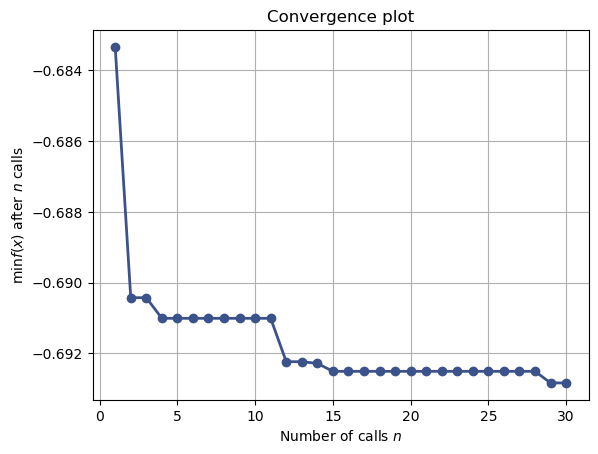

In [93]:
# Progress visualization
plot_convergence(search_result)
# plt.savefig("Converge.png", dpi=400)
plt.show()

In [94]:
#Optimal hyper parameter
search_result.x

[0.0006972091667342012, 3, 20, 'relu']

In [95]:
search_result.fun

-0.6928384304046631

## Build the model with optimized hyper-parameters

In [181]:
opt_par = [0.0006972091667342012, 3, 20, 'relu']

In [182]:
# use hyper-parameters from optimization
learning_rate = opt_par[0]
num_layers = opt_par[1]
num_nodes = opt_par[2]
activation = opt_par[3]

In [183]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


# Seed value
# Apparently you may use different seed values at each stage
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


input_var = X_train.shape[1]
model = Sequential()
model.add(InputLayer(input_shape=input_var))
model.add(BatchNormalization())
model.add(Dense(num_nodes, activation=activation, kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dense(num_nodes, activation=activation, kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dense(num_nodes, activation=activation, kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

optimizer = Adam(learning_rate=learning_rate)
    
model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])

# histories = model.fit(X_train,y_train, validation_data=(X_oot, y_oot),
#             verbose=2,epochs=50)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=30, 
                        verbose=1, mode='min', restore_best_weights=True)

histories = model.fit(X_train,y_train, validation_data=(X_oot, y_oot), batch_size=32,
          callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
13909/13909 - 29s - loss: 0.6113 - accuracy: 0.6760 - val_loss: 0.6007 - val_accuracy: 0.6931 - 29s/epoch - 2ms/step
Epoch 2/100
13909/13909 - 25s - loss: 0.6061 - accuracy: 0.6799 - val_loss: 0.5989 - val_accuracy: 0.6937 - 25s/epoch - 2ms/step
Epoch 3/100
13909/13909 - 25s - loss: 0.6050 - accuracy: 0.6807 - val_loss: 0.6014 - val_accuracy: 0.6916 - 25s/epoch - 2ms/step
Epoch 4/100
13909/13909 - 26s - loss: 0.6042 - accuracy: 0.6816 - val_loss: 0.6000 - val_accuracy: 0.6936 - 26s/epoch - 2ms/step
Epoch 5/100
13909/13909 - 26s - loss: 0.6037 - accuracy: 0.6816 - val_loss: 0.5994 - val_accuracy: 0.6940 - 26s/epoch - 2ms/step
Epoch 6/100
13909/13909 - 26s - loss: 0.6032 - accuracy: 0.6822 - val_loss: 0.5991 - val_accuracy: 0.6929 - 26s/epoch - 2ms/step
Epoch 7/100
13909/13909 - 26s - loss: 0.6028 - accuracy: 0.6826 - val_loss: 0.5987 - val_accuracy: 0.6945 - 26s/epoch - 2ms/step
Epoch 8/100
13909/13909 - 26s - loss: 0.6027 - accuracy: 0.6824 - val_loss: 0.5997 - val_accuracy

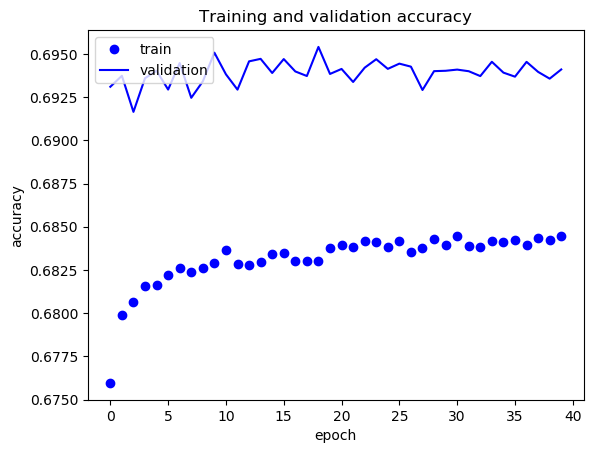

In [184]:
plt.plot(histories.history['accuracy'], 'bo')
plt.plot(histories.history['val_accuracy'],'b' )
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("accu.png", dpi=400)
plt.show()

## Save tuned Neural Network Model

In [202]:
model.save('Tuned Attributes 110 Neural Network.h5')

## Load Untuned Neural Network Model

In [ ]:
from keras.models import load_model
model = load_model('Tuned Attributes 110 Neural Network.h5')

## Tuned Neural Network Performance

In [185]:
df_summary_comp_dev = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=1)
df_summary_comp_dev

13909/13909 [==============================] - 12s 821us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(490.0, 1000.0]",44309,"25,817",58.27%,58.27%,44507,"28,300",63.59%,63.59%,-8.37%
1,"(416.0, 490.0]",44064,"20,497",46.52%,52.41%,44506,"22,135",49.73%,56.66%,-7.51%
2,"(366.0, 416.0]",45129,"18,145",40.21%,48.28%,44506,"18,878",42.42%,51.91%,-6.99%
3,"(329.0, 366.0]",44169,"16,069",36.38%,45.32%,44506,"16,576",37.24%,48.25%,-6.05%
4,"(305.0, 329.0]",44283,"15,418",34.82%,43.23%,44506,"14,809",33.27%,45.25%,-4.47%
5,"(277.0, 305.0]",44406,"13,533",30.48%,41.10%,44506,"13,070",29.37%,42.60%,-3.53%
6,"(249.0, 277.0]",44205,"11,938",27.01%,39.10%,44506,"11,306",25.40%,40.15%,-2.62%
7,"(219.0, 249.0]",45423,"10,644",23.43%,37.10%,44506,"9,378",21.07%,37.76%,-1.76%
8,"(186.0, 219.0]",43576,"8,660",19.87%,35.22%,44506,"7,832",17.60%,35.52%,-0.85%
9,"(0.0, 186.0]",45498,"6,677",14.68%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


In [188]:
df_summary_comp_val = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=1)
df_summary_comp_val

7338/7338 [==============================] - 6s 833us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(504.0, 919.0]",23397,"13,615",58.19%,58.19%,23480,"14,947",63.66%,63.66%,-8.59%
1,"(427.0, 504.0]",23397,"10,427",44.57%,51.38%,23479,"11,205",47.72%,55.69%,-7.74%
2,"(375.0, 427.0]",23590,"8,792",37.27%,46.65%,23480,"9,597",40.87%,50.75%,-8.08%
3,"(337.0, 375.0]",23394,"7,824",33.44%,43.36%,23479,"8,115",34.56%,46.70%,-7.17%
4,"(313.0, 337.0]",23466,"7,521",32.05%,41.09%,23479,"7,403",31.53%,43.67%,-5.90%
5,"(284.0, 313.0]",23299,"6,504",27.92%,38.91%,23480,"6,483",27.61%,40.99%,-5.09%
6,"(257.0, 284.0]",23030,"6,009",26.09%,37.10%,23479,"5,802",24.71%,38.67%,-4.04%
7,"(227.0, 257.0]",23628,"5,637",23.86%,35.43%,23480,"5,097",21.71%,36.55%,-3.05%
8,"(190.0, 227.0]",23908,"5,123",21.43%,33.85%,23479,"4,126",17.57%,34.44%,-1.72%
9,"(0.0, 190.0]",23686,"4,004",16.90%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


In [189]:
df_summary_comp_rand = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final, xgb_object=model,num_bins=10,old_score=prev_mdl_rand,Dmatrix=X_rand,weight=1)
df_summary_comp_rand

15305/15305 [==============================] - 13s 826us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(429.0, 976.0]",48777,167,0.34%,0.34%,48975,290,0.59%,0.59%,-42.18%
1,"(366.0, 429.0]",48640,136,0.28%,0.31%,48975,140,0.29%,0.44%,-29.15%
2,"(328.0, 366.0]",49043,102,0.21%,0.28%,48975,83,0.17%,0.35%,-20.80%
3,"(314.0, 328.0]",47996,76,0.16%,0.25%,48974,82,0.17%,0.30%,-18.56%
4,"(288.0, 314.0]",50382,63,0.13%,0.22%,48975,78,0.16%,0.27%,-19.16%
5,"(268.0, 288.0]",48391,82,0.17%,0.21%,48975,53,0.11%,0.25%,-13.59%
6,"(246.0, 268.0]",49459,64,0.13%,0.20%,48974,49,0.10%,0.23%,-10.93%
7,"(224.0, 246.0]",47517,63,0.13%,0.19%,48975,32,0.07%,0.21%,-6.31%
8,"(195.0, 224.0]",49300,58,0.12%,0.18%,48975,35,0.07%,0.19%,-3.40%
9,"(39.0, 195.0]",50243,49,0.10%,0.18%,48975,18,0.04%,0.18%,0.00%


In [187]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = model

Dmatrix_dev = X_train
Dmatrix_val = X_oot
Dmatrix_rand = X_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train1 = model_obj_ks.predict(Dmatrix_dev)
pred_train=[]
for i in pred_train1:
    pred_train.append(i[0])
pred_train = np.array(pred_train)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)


pred_oot1 = model_obj_ks.predict(Dmatrix_val)
pred_oot=[]
for i in pred_oot1:
    pred_oot.append(i[0])
pred_oot = np.array(pred_oot)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)


pred_rand1 = model_obj_ks.predict(Dmatrix_rand)
pred_rand=[]
for i in pred_rand1:
    pred_rand.append(i[0])
pred_rand = np.array(pred_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


15305/15305 [==============================] - 13s 827us/step


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.228,0.659,0.276,0.692,0.00%,0.00%
1,VAL,0.206,0.646,0.269,0.689,10.80%,2.06%
2,Random,0.175,0.610,0.304,0.711,30.08%,8.09%


### Development - Weighted

In [190]:
df_summary_comp_dev_w = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=125)
df_summary_comp_dev_w

13909/13909 [==============================] - 11s 821us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(450.0, 1000.0]",3713046,"36,046",0.97%,0.97%,3735472,"42,472",1.14%,1.14%,-14.62%
1,"(382.0, 450.0]",3703899,"22,024",0.59%,0.78%,3735556,"23,681",0.63%,0.89%,-11.58%
2,"(339.0, 382.0]",3777047,"18,047",0.48%,0.68%,3735534,"18,034",0.48%,0.75%,-9.48%
3,"(313.0, 339.0]",3707635,"16,135",0.44%,0.62%,3735476,"15,101",0.40%,0.66%,-6.83%
4,"(285.0, 313.0]",3674424,"13,299",0.36%,0.57%,3735619,"12,744",0.34%,0.60%,-5.27%
5,"(259.0, 285.0]",3759381,"11,881",0.32%,0.53%,3735492,"10,492",0.28%,0.55%,-3.82%
6,"(233.0, 259.0]",3776527,"9,902",0.26%,0.49%,3735614,"8,614",0.23%,0.50%,-2.76%
7,"(207.0, 233.0]",3680412,"8,287",0.23%,0.46%,3735487,"7,112",0.19%,0.46%,-1.60%
8,"(177.0, 207.0]",3734558,"6,808",0.18%,0.42%,3735549,"5,674",0.15%,0.43%,-0.76%
9,"(0.0, 177.0]",3828469,"4,969",0.13%,0.39%,3735599,"3,474",0.09%,0.39%,0.00%


### Validation - Weighted

In [191]:
df_summary_comp_val_w = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=125)
df_summary_comp_val_w

7338/7338 [==============================] - 6s 839us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(462.0, 919.0]",1990011,"19,011",0.96%,0.96%,1999243,"22,243",1.11%,1.11%,-14.13%
1,"(393.0, 462.0]",1993305,"10,555",0.53%,0.74%,1999212,"11,712",0.59%,0.85%,-12.59%
2,"(350.0, 393.0]",1983518,"8,268",0.42%,0.63%,1999273,"8,773",0.44%,0.71%,-11.00%
3,"(316.0, 350.0]",1978618,"7,368",0.37%,0.57%,1999355,"7,480",0.37%,0.63%,-9.39%
4,"(294.0, 316.0]",2007426,"7,051",0.35%,0.53%,1999215,"6,340",0.32%,0.57%,-7.19%
5,"(270.0, 294.0]",1969106,"5,731",0.29%,0.49%,1999378,"5,378",0.27%,0.52%,-5.79%
6,"(243.0, 270.0]",2062452,"5,452",0.26%,0.45%,1999211,"4,711",0.24%,0.48%,-4.73%
7,"(216.0, 243.0]",1957856,"4,606",0.24%,0.43%,1999274,"3,899",0.20%,0.44%,-3.22%
8,"(182.0, 216.0]",2010382,"4,257",0.21%,0.40%,1999340,"3,090",0.15%,0.41%,-1.58%
9,"(0.0, 182.0]",2040157,"3,157",0.15%,0.38%,1999330,"1,830",0.09%,0.38%,0.00%


In [192]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = model

Dmatrix_dev = X_train
Dmatrix_val = X_oot
Dmatrix_rand = X_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train1 = model_obj_ks.predict(Dmatrix_dev)
pred_train=[]
for i in pred_train1:
    pred_train.append(i[0])
pred_train = np.array(pred_train)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)


pred_oot1 = model_obj_ks.predict(Dmatrix_val)
pred_oot=[]
for i in pred_oot1:
    pred_oot.append(i[0])
pred_oot = np.array(pred_oot)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)


pred_rand1 = model_obj_ks.predict(Dmatrix_rand)
pred_rand=[]
for i in pred_rand1:
    pred_rand.append(i[0])
pred_rand = np.array(pred_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


15305/15305 [==============================] - 13s 829us/step


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.228,0.659,0.276,0.692,0.00%,0.00%
1,VAL,0.206,0.646,0.269,0.689,10.80%,2.06%
2,Random,0.175,0.610,0.304,0.711,30.08%,8.09%


## Variable Sensitivity

In [193]:
# Input the XGBoost model object and the data frame used to train that model
xgb_object = model

df_stdev = dev_final



mean_list = []
stdev1_list = []
stdev2_list = []
stdev3_list = []


final_vars = list(df_stdev)
final_vars.remove('RESPONSE_FLG')



for var in final_vars:
    mean_val = int(np.nanmean (df_stdev[var]))
    mean_list.append(mean_val)
    
    stdev1_val = int(np.std (df_stdev[var])) + mean_val
    stdev1_list.append(stdev1_val)
    
    stdev2_val = int(np.std (df_stdev[var]))*2 + mean_val
    stdev2_list.append(stdev2_val)
    
    stdev3_val = int(np.std (df_stdev[var]))*3 + mean_val
    stdev3_list.append(stdev3_val)


df_stdev2 = pd.DataFrame([mean_list,stdev1_list,stdev2_list,stdev3_list], columns =final_vars, dtype = float)

df_means2 = pd.DataFrame([mean_list], columns =final_vars, dtype = float)

df_means = pd.concat([df_means2]*4, ignore_index=True)


result_summary = []

i=0
for var2 in final_vars:
    df_new = df_means.drop(var2,axis=1)
    df_new.insert(i, var2, df_stdev2[var2])
    
    i += 1
    
    #xgb_one = xgb.DMatrix(df_new)
    pred_one = model.predict(df_new, verbose=0)
    
    std1_chg = ((pred_one[1]/pred_one[0])-1)[0]
    std2_chg = ((pred_one[2]/pred_one[0])-1)[0]
    std3_chg = ((pred_one[3]/pred_one[0])-1)[0]
    
    result_summary.append([var2,std1_chg,std2_chg,std3_chg])
    
    
var_sensitivity3 = pd.DataFrame(result_summary)
var_sensitivity3.columns = ['Variable','One_STDEV_CHG','Two_STDEV_CHG','Three_STDEV_CHG']


# # Only select variables used in final model

# feature_list = xgb_object.get_score(importance_type='gain')
# keys1 = list(feature_list.keys())
# values1 = list(feature_list.values())
 
# feature_list_rank = pd.DataFrame(data=values1, index=keys1, columns=["gain"]).sort_values(by = "gain", ascending=False)    
    
# mdl_vars = feature_list_rank.index   

# var_sensitivity2 = var_sensitivity3[var_sensitivity3['Variable'].isin(mdl_vars)]

# var_sensitivity_2 = var_sensitivity2.sort_values('Two_STDEV_CHG',ascending=False)

var_sensitivity = var_sensitivity3.copy()

var_sensitivity



,Variable,One_STDEV_CHG,Two_STDEV_CHG,Three_STDEV_CHG
0,ibe_6864,0.106340,0.086393,0.069819
1,ibe_8614,-0.020725,-0.041849,-0.062127
2,ibe_8167_01,0.039151,0.061669,0.124295
3,ibe_9351,-0.022142,-0.037773,-0.052303
4,ibe_7607_01,-0.022887,-0.044259,-0.062891
...,...,...,...,...
105,fht_dayssince1ststandarddecline,0.080264,0.141580,0.158092
106,fht_3mo_total,0.107795,0.257068,0.420397
107,fht_3mo_bigbook,0.000000,0.000000,0.000000
108,fht_1mo_total,0.000000,0.000000,0.000000


## Review Variables

In [194]:
initial_vars = pd.DataFrame(list(X_train))
initial_vars.columns = ['Variable']

In [195]:
initial_vars

,Variable
0,ibe_6864
1,ibe_8614
2,ibe_8167_01
3,ibe_9351
4,ibe_7607_01
...,...
105,fht_dayssince1ststandarddecline
106,fht_3mo_total
107,fht_3mo_bigbook
108,fht_1mo_total


## Bring in Variable Description and Source File

In [196]:
#label_desc = pd.read_csv('label_file.csv', engine='python')
label_desc = pd.read_csv('label_file.csv', encoding='unicode_escape')

## Final Variable Summary

In [197]:
final_var_summary = pd.merge(initial_vars, label_desc, how='left', left_on=['Variable'], right_on=['Variable'])

In [198]:
final_var_summary

,Variable,Description,Source
0,ibe_6864,RFM - Weeks Since Last Order - General Merchan...,InfoBase
1,ibe_8614,Base Record Verification Date,InfoBase
2,ibe_8167_01,Mail Order Buyer Categories Apparel - Female A...,InfoBase
3,ibe_9351,UnderBanked Indicator,InfoBase
4,ibe_7607_01,Home Length of Residence - 100% LOR,InfoBase
...,...,...,...
105,fht_dayssince1ststandarddecline,fht_dayssince1ststandarddecline,promo
106,fht_3mo_total,fht_3mo_total,promo
107,fht_3mo_bigbook,fht_3mo_bigbook,promo
108,fht_1mo_total,fht_1mo_total,promo


## Variable Source Summary

In [199]:
source_summary = final_var_summary['Source'].value_counts()
source_summary_df = pd.DataFrame(source_summary)
source_summary_df.columns = ['Number_Variables']
source_summary_df

,Number_Variables
miacs,58
InfoBase,22
LexisNexis,17
promo,13


## Write out Initial Modeling Report to Excel

In [200]:
import openpyxl
import xlsxwriter

In [201]:
#create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('Tuned Attributes110 (No Experian) Neural Network NCA Model Summary - (2022.11.30).xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
dev_mail.to_excel(writer, sheet_name='DEV Campaigns')
val_mail.to_excel(writer, sheet_name='VAL Campaigns')
rand_mail.to_excel(writer, sheet_name='RAND Campaigns')

#final_model_params2.to_excel(writer, sheet_name='Hyper Parameters')
#importance_rank_nn_bo2.to_excel(writer, sheet_name='Variable Importance')
#rank_numtrees2.to_excel(writer, sheet_name='Variable Numer of Trees')
var_sensitivity.to_excel(writer, sheet_name='Variable Sensitivity')
ks_auc_summary.to_excel(writer, sheet_name='KS and AUC')
df_summary_comp_dev.to_excel(writer, sheet_name='DEV Summary')
df_summary_comp_val.to_excel(writer, sheet_name='VAL Summary')
df_summary_comp_rand.to_excel(writer, sheet_name='Random Summary')

df_summary_comp_dev_w.to_excel(writer, sheet_name='DEV Summary - Weighted')
df_summary_comp_val_w.to_excel(writer, sheet_name='VAL Summary - Weighted')

#top_ten_vars.to_excel(writer, sheet_name='Top 10 Variables')
final_var_summary.to_excel(writer, sheet_name='Final Model Variables')
source_summary_df.to_excel(writer, sheet_name='Variable Source Summary')

#swap_perf.to_excel(writer, sheet_name='Swap Set Analysis')

#close the Pandas Excel writer and output the Excel file
writer.save()

## Shap Feature Importance

In [203]:
pip install shap

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached shap-0.41.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (569 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling packaging-20.1:
      Successfully uninstalled packaging-20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
sagemaker 2.116.0 requires importlib-metadata<5.0,>=1.4.0, but you have importlib-metadata 5.0.0 which is incompatible.
docker-compose 1.29.2 requires PyYAML<6,>=3.10, but you have pyyaml 6.0 which is incompatible.
Note: you may need to restart th

In [204]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
#import lifelines
import shap

In [205]:
plt.rcParams['figure.figsize'] = [10, 7]

In [206]:
features = list(X_train)

In [250]:
X_train_summary = shap.kmeans(X_train, 50)
explainer = shap.KernelExplainer(model, X_train_summary)

In [251]:
shap.initjs()
shap_values = explainer.shap_values(X_train.sample(n=300))

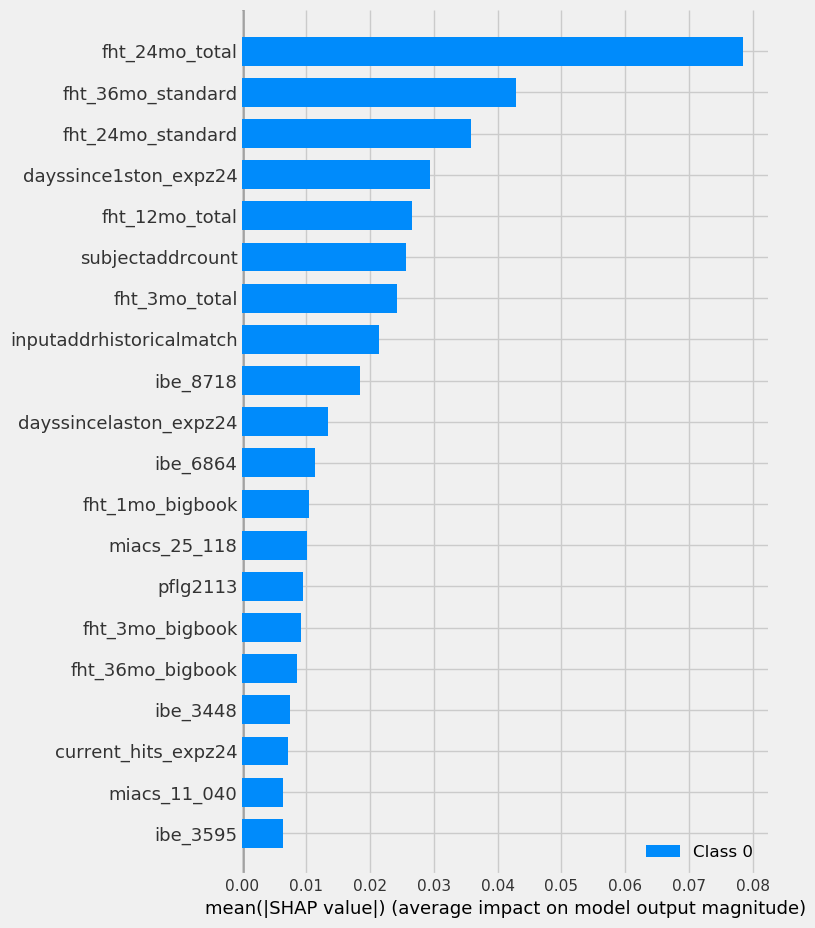

In [252]:
# Feature Importance (on development data)
shap.summary_plot(shap_values,X_oot,feature_names=list(X_train))

In [253]:
# Feature Importance (on validation data)
explainer1 = shap.Explainer(model, X_oot)
shap_values = explainer1(X_oot.sample(n=300))

Permutation explainer: 301it [00:25, 11.87it/s]                         


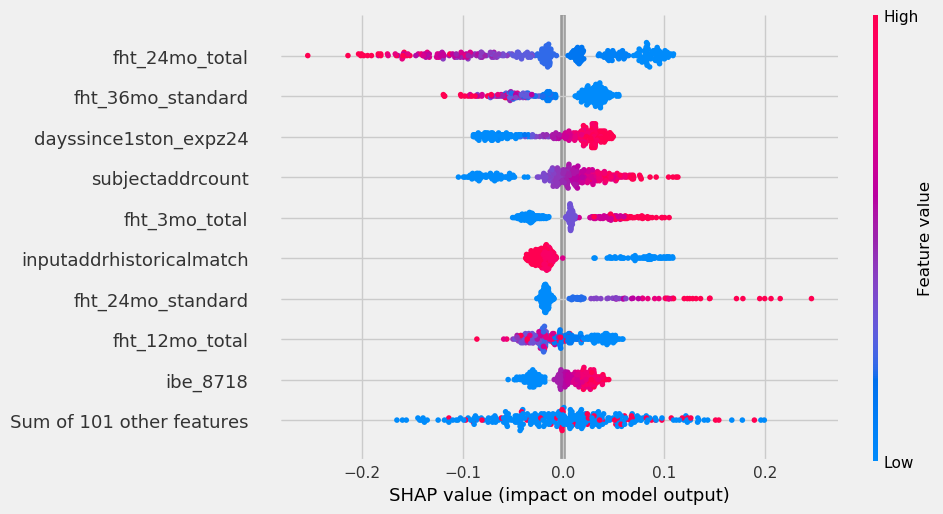

In [261]:
shap.plots.beeswarm(shap_values)

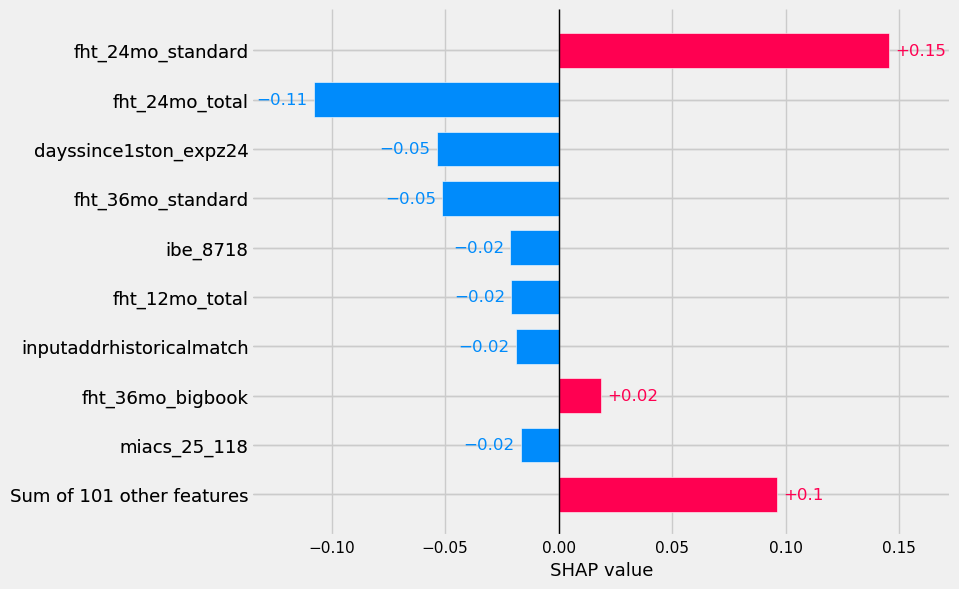

In [254]:
# Feature Contribution on a specific data point
shap.plots.bar(shap_values[0])